In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:

url="https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


imports

In [111]:
 # shows dtypes and non-null counts
 print("shape:", df.shape)
display(df.head(8))
display(df.info())

shape: (909, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",MALE,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


None

Explore missing values & basic stats

In [112]:
# how many missing per column
missing_count = df.isnull().sum()
missing_pct   = (df.isnull().mean() * 100).round(2)
pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct}).sort_values("missing_pct", ascending=False)


,missing_count,missing_pct
Cabin,701,77.12
Age,199,21.89
Fare,18,1.98
Embarked,2,0.22
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
PassengerId,0,0.00
Parch,0,0.00
SibSp,0,0.00


Convert columns to the proper types

In [113]:
# Convert 'Age' and 'Fare' columns to numbers (if not already numbers)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')

# Check the data types after conversion
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Handle missing values

In [114]:
# Check how many missing values in each column
print(df.isnull().sum())
print("----------------------------")
# Example: Drop rows where 'Pclass' is missing (important column)
df = df.dropna(subset=['Pclass'])
print("----------------------------")

# Fill missing Age with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print("----------------------------")
# Fill missing Fare with median
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)
print("----------------------------")
# Fill missing Embarked with the most common value (mode)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)
print("----------------------------")
# Check again to make sure missing values are handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass          18
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64


/tmp/ipython-input-3049503419.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-3049503419.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Fix inconsistent categorical values

In [115]:
# Make 'Sex' values consistent (lowercase)
df['Sex'] = df['Sex'].astype(str).str.lower().str.strip()

# Make 'Embarked' values consistent (uppercase)
df['Embarked'] = df['Embarked'].astype(str).str.upper().str.strip()

# Check the unique values to confirm
print("Unique values in Sex:", df['Sex'].unique())
print("Unique values in Embarked:", df['Embarked'].unique())



Unique values in Sex: ['male' 'female']
Unique values in Embarked: ['S' 'C' 'Q' 'CHERBOURG' 'SOUTHAMPTON']


Remove duplicate rows

In [116]:
# Check how many duplicate rows exist
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Check again
print("After removing duplicates:", df.duplicated().sum())


Number of duplicate rows: 12
After removing duplicates: 0


Detect & handle outliers IQR method

In [117]:
#  Handling outliers
# For Age column
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Keep only rows inside the range
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

# For Fare column
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

df = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

print("Outliers handled")


Outliers handled


In [118]:
#  Handling duplicates

print("Number of duplicate rows before:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

print("Number of duplicate rows after:", df.duplicated().sum())


Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [119]:
#  Correcting inconsistencies
# -----------------------------------
# Convert Sex column to lowercase
df['Sex'] = df['Sex'].str.lower()

# Strip spaces and uppercase the first letter in Embarked column
df['Embarked'] = df['Embarked'].str.strip().str.upper()

print(" Inconsistencies corrected")


 Inconsistencies corrected


Final check & save cleaned file

In [120]:
# Final check for missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Check final shape
print("Final shape of data:", df.shape)

# Save cleaned dataset to a new CSV file
df.to_csv("titanic_cleaned_basic.csv", index=False)

# If you want to download the file in Colab:
from google.colab import files
files.download("titanic_cleaned_basic.csv")


print("Data types:\n", df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          612
Embarked         0
dtype: int64
Final shape of data: (711, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data types:
 PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0     3.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   
5            6         0     3.0   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  28.0      0  

Survival Rate by Passenger Class

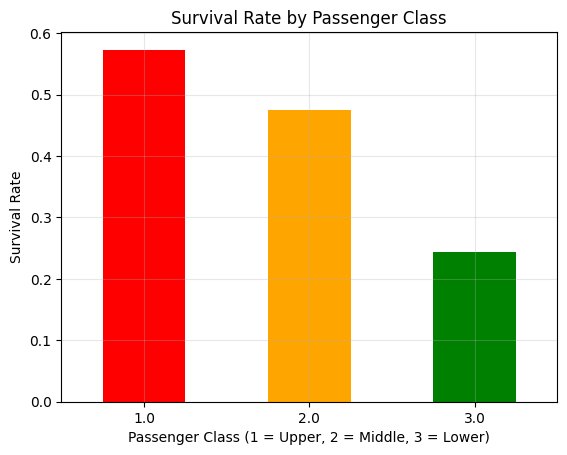

In [121]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

 Number of Survivors vs Non-Survivors

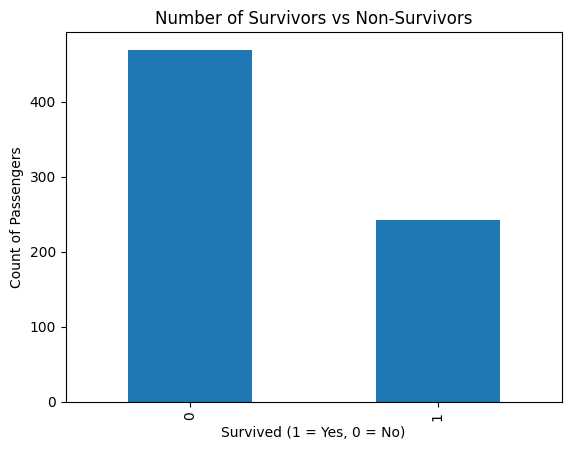

In [122]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Number of Survivors vs Non-Survivors')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count of Passengers')
plt.show()

Survival Rate by Embarkation Port

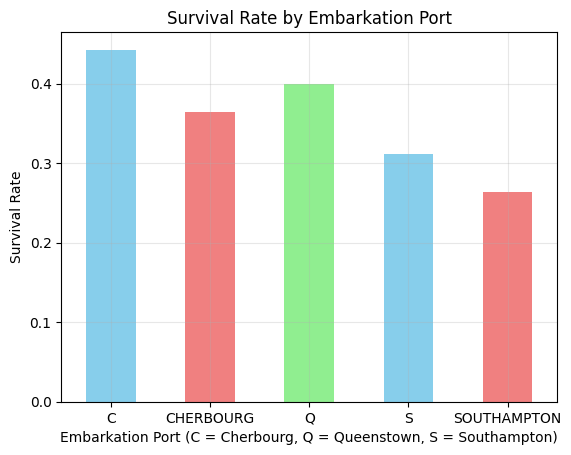

In [123]:
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of Survival

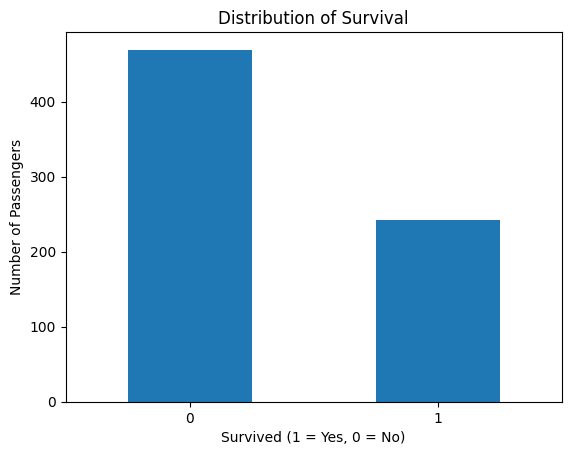

In [124]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Distribution of Survival')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

# Survival Rate by Gender

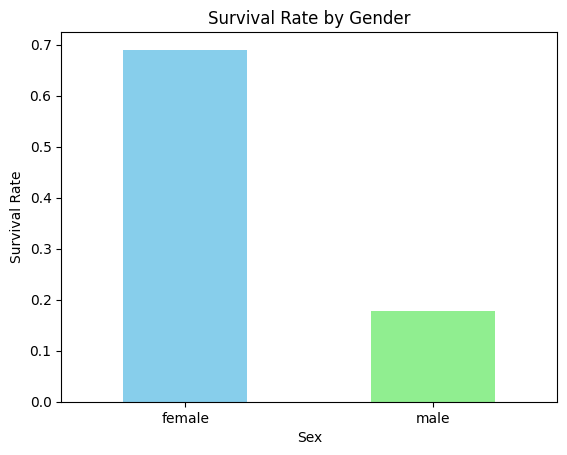

In [125]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

# Age Distribution by Survival

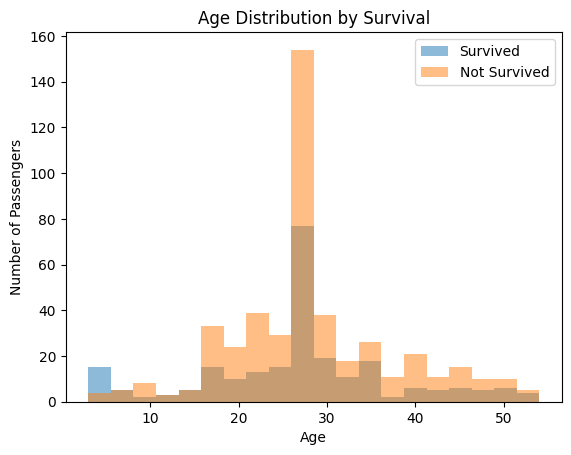

In [126]:
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Survival Rate by Number of Siblings/Spouses (SibSp)

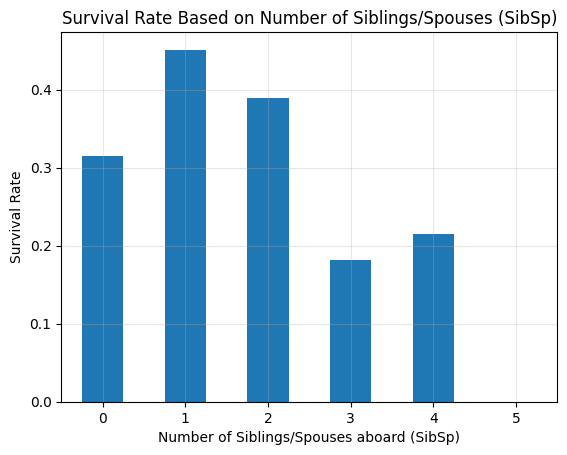

In [127]:
df.groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate Based on Number of Siblings/Spouses (SibSp)')
plt.xlabel('Number of Siblings/Spouses aboard (SibSp)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

Survival Rate by Age Groups

/tmp/ipython-input-4282955877.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')


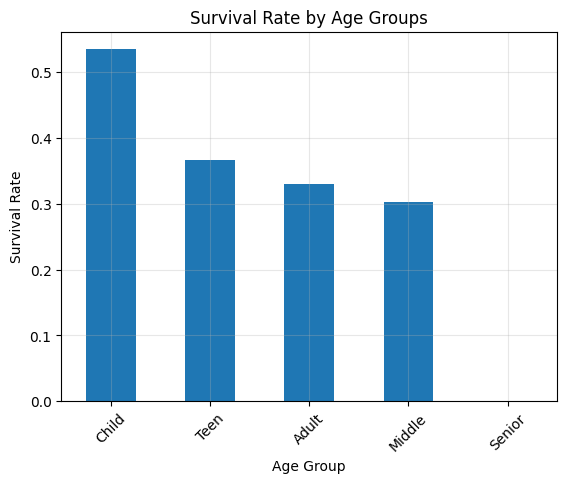

In [128]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Survival Rate by Fare Groups

/tmp/ipython-input-1745579142.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareGroup')['Survived'].mean().plot(kind='bar')


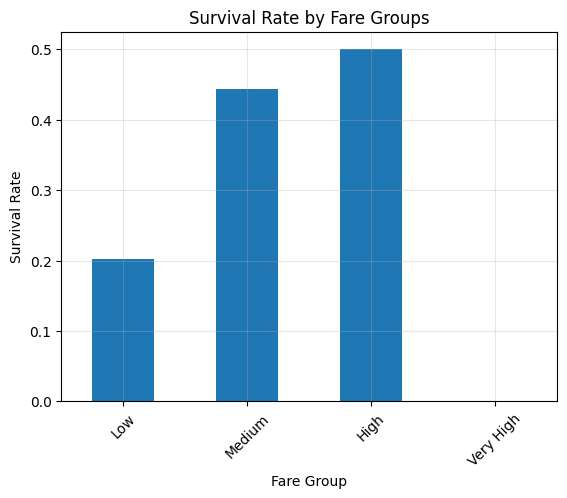

In [129]:
# Create fare groups
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 30, 100, 600],
                         labels=['Low', 'Medium', 'High', 'Very High'])

df.groupby('FareGroup')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Fare Groups')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Combined Class and Gender Survival

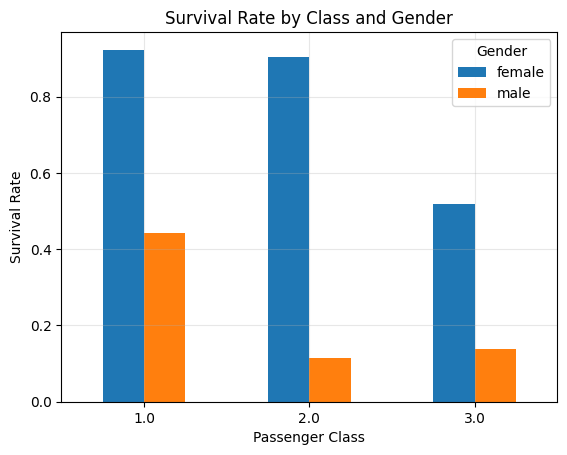

In [130]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

Fare Distribution by Survival

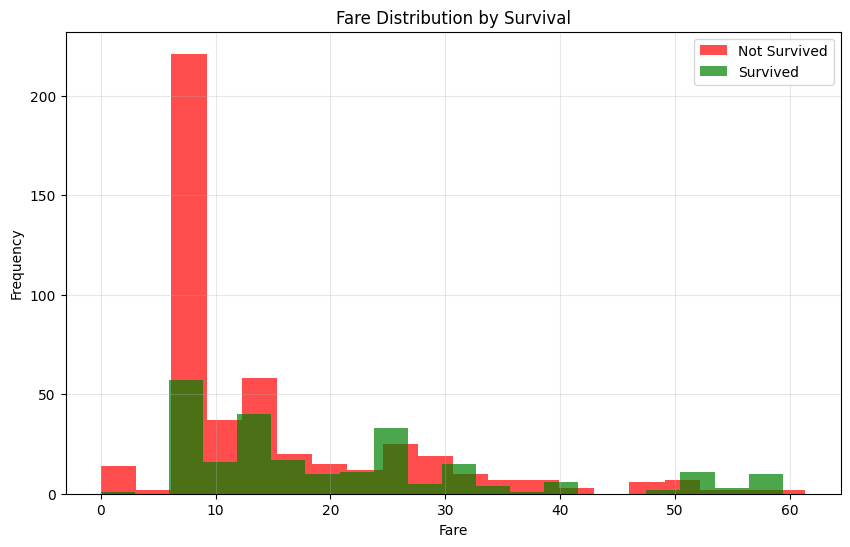

In [131]:
plt.figure(figsize=(10, 6))
df[df['Survived'] == 0]['Fare'].hist(alpha=0.7, bins=20, label='Not Survived', color='red')
df[df['Survived'] == 1]['Fare'].hist(alpha=0.7, bins=20, label='Survived', color='green')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Survival Rate by Family Size


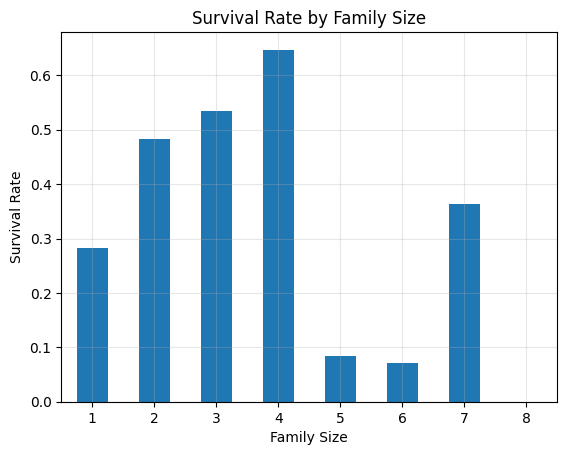

In [132]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.groupby('FamilySize')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

Prepare data for modeling

Data types:
Pclass         float64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
AgeGroup      category
FareGroup     category
FamilySize       int64
dtype: object

Unique values in each column:
Pclass: [3. 1. 2.]
Sex: ['male' 'female']
Age: [22. 26. 35. 28. 54. 27. 14.  4. 39. 31.]
SibSp: [1 0 3 2 4 5]
Parch: [0 2 1 5 3 4 6]
Fare: [ 7.25    7.925  53.1     8.05    8.4583 51.8625 11.1333 30.0708 16.7
 31.275 ]
Embarked: ['S' 'Q' 'C' 'CHERBOURG' 'SOUTHAMPTON']
AgeGroup: ['Adult', 'Middle', 'Teen', 'Child']
Categories (5, object): ['Child' < 'Teen' < 'Adult' < 'Middle' < 'Senior']
FareGroup: ['Low', 'High', 'Medium', NaN]
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
FamilySize: [2 1 3 7 5 4 6 8]

Categorical columns to encode: ['Sex', 'Embarked', 'AgeGroup', 'FareGroup']

Data types after encoding:
Pclass        float64
Sex             int64
Age           float64
SibSp        

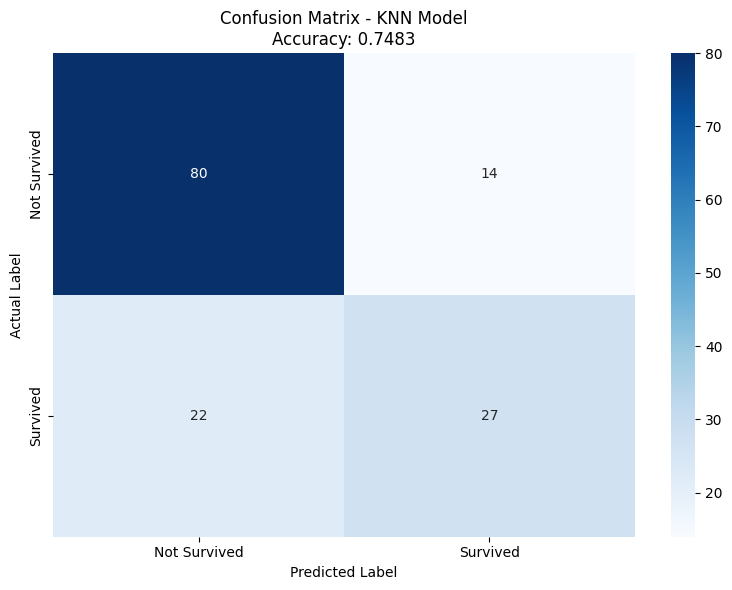

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        94
           1       0.66      0.55      0.60        49

    accuracy                           0.75       143
   macro avg       0.72      0.70      0.71       143
weighted avg       0.74      0.75      0.74       143



In [133]:
# Prepare data for modeling
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
X = df.drop(['Survived'] + features_to_drop, axis=1)
y = df['Survived']

# Check data types and unique values to identify all categorical columns
print("Data types:")
print(X.dtypes)
print("\nUnique values in each column:")
for col in X.columns:
    print(f"{col}: {X[col].unique()[:10]}")  # Show first 10 unique values

# Identify categorical columns dynamically
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nCategorical columns to encode: {categorical_columns}")

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Now all columns should be numeric - verify this
print(f"\nData types after encoding:")
print(X.dtypes)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title(f'Confusion Matrix - KNN Model\nAccuracy: {accuracy:.4f}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

Distribution Plots for Numerical Features

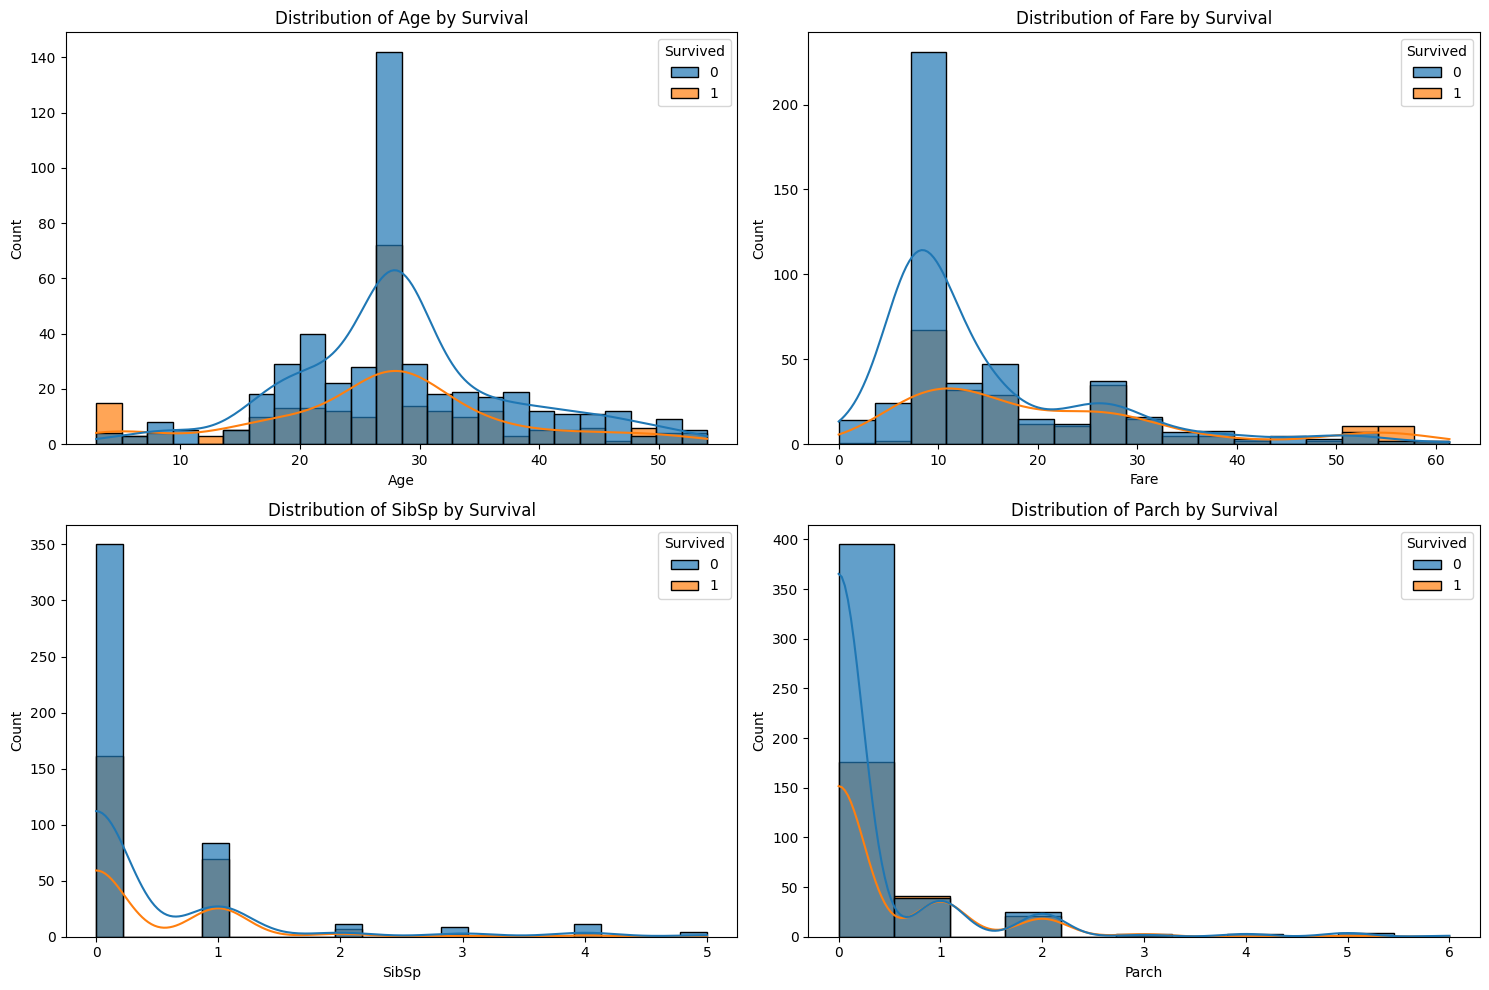

In [134]:
# Distribution of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='Survived', ax=axes[i], alpha=0.7, kde=True)
    axes[i].set_title(f'Distribution of {feature} by Survival')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Feature Engineering for better model performance

In [135]:
# This cell's original content contained redundant feature engineering and encoding that conflicted with subsequent steps.
# Its functionalities for column cleaning and initial numeric type conversion are now handled by earlier cells or will be handled in a more structured way.
# This cell will be left empty to avoid errors.

In [136]:
# =====  FEATURE ENGINEERING =====
print("Starting feature engineering...")

# First, let's see what columns we actually have
print("Available columns:", df.columns.tolist())

# Family size feature (using existing columns)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# For Title extraction, we need the Name column. If it's missing, we'll skip it.
if 'Name' in df.columns:
    # Extract titles from names (Fixed SyntaxWarning with raw string r'')
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    print("✓ Title feature created from Name column")
else:
    print("⚠️ Name column not available - skipping Title feature")

# Age bins (only if Age column exists)
if 'Age' in df.columns:
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])
    print("✓ AgeBin feature created")
else:
    print("⚠️ Age column not available - skipping AgeBin feature")

# Fare bins (only if Fare column exists)
if 'Fare' in df.columns:
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])
    print("✓ FareBin feature created")
else:
    print("⚠️ Fare column not available - skipping FareBin feature")

# Cabin features (only if Cabin column exists)
if 'Cabin' in df.columns:
    df['CabinLetter'] = df['Cabin'].str[0]
    df['CabinLetter'] = df['CabinLetter'].fillna('Unknown')
    df['HasCabin'] = df['CabinLetter'].apply(lambda x: 0 if x == 'Unknown' else 1)
    print("✓ Cabin features created")
else:
    print("⚠️ Cabin column not available - skipping Cabin features")

print("\nFeature engineering completed!")
print(f"New shape: {df.shape}")
print("All columns:", df.columns.tolist())

# Show which new features were successfully created
new_feature_candidates = ['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'CabinLetter', 'HasCabin']
successful_new_features = [col for col in new_feature_candidates if col in df.columns]
print("Successfully created new features:", successful_new_features)

Starting feature engineering...
Available columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareGroup', 'FamilySize']
✓ Title feature created from Name column
✓ AgeBin feature created
✓ FareBin feature created
✓ Cabin features created

Feature engineering completed!
New shape: (711, 21)
All columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'CabinLetter', 'HasCabin']
Successfully created new features: ['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'CabinLetter', 'HasCabin']


MISSING VALUE HANDLING

In [139]:
# =====  MISSING VALUE HANDLING =====
print("Improving missing value handling...")

# First, let's see what columns we actually have
print("Available columns:", df.columns.tolist())

# Check which grouping columns are available
available_grouping_columns = []
if 'Pclass' in df.columns:
    available_grouping_columns.append('Pclass')
if 'Sex' in df.columns:
    available_grouping_columns.append('Sex')

print(f"Available grouping columns: {available_grouping_columns}")

# Handle Age missing values - FIXED APPROACH
if 'Age' in df.columns:
    if available_grouping_columns:  # If we have at least one grouping column
        # Create a safer approach without groupby apply
        df_original = df.copy()

        # Calculate median ages for each group
        median_ages = df.groupby(available_grouping_columns)['Age'].median().reset_index()

        # Merge the median ages back to the original dataframe
        df = df.merge(median_ages, on=available_grouping_columns, how='left',
                     suffixes=('', '_median'))

        # Fill missing Age values with the group median
        age_mask = df['Age'].isnull()
        df.loc[age_mask, 'Age'] = df.loc[age_mask, 'Age_median']

        # Drop the temporary median column
        df = df.drop('Age_median', axis=1)

        print(f"✓ Age missing values filled using groups: {available_grouping_columns}")
    else:
        # If no grouping columns available, use overall median
        median_age = df['Age'].median()
        df['Age'].fillna(median_age, inplace=True)
        print("✓ Age missing values filled using overall median")
else:
    print("⚠️ Age column not available")

# Handle Fare missing values
if 'Fare' in df.columns:
    median_fare = df['Fare'].median()
    df['Fare'].fillna(median_fare, inplace=True)
    print("✓ Fare missing values filled with median")

# Handle Embarked missing values
if 'Embarked' in df.columns:
    mode_embarked = df['Embarked'].mode()[0] if not df['Embarked'].mode().empty else 'S'
    df['Embarked'].fillna(mode_embarked, inplace=True)
    print("✓ Embarked missing values filled with mode")

# Handle Cabin missing values - since most are missing, we'll create a new feature
if 'Cabin' in df.columns:
    # Create a new feature indicating whether cabin info is available
    df['HasCabin'] = df['Cabin'].notnull().astype(int)
    # For Cabin itself, we can fill with 'Unknown' or keep as is for now
    df['Cabin'].fillna('Unknown', inplace=True)
    print("✓ Cabin missing values handled - created HasCabin feature")

# Check for any other columns with missing values and handle them
print("\nChecking for other missing values...")
missing_summary = df.isnull().sum()
columns_with_missing = missing_summary[missing_summary > 0]

if not columns_with_missing.empty:
    print("Columns with missing values:")
    print(columns_with_missing)

    for col in columns_with_missing.index:
        # Check the data type of the column
        col_dtype = df[col].dtype

        # Handle categorical/object columns
        if col_dtype == 'object' or col_dtype.name == 'category':
            mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
            df[col].fillna(mode_val, inplace=True)
            print(f"  {col} (categorical): filled with mode '{mode_val}'")

        # Handle numerical columns (int or float)
        elif col_dtype in ['int64', 'float64', 'int32', 'float32']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  {col} (numerical): filled with median {median_val}")

        # Handle boolean columns
        elif col_dtype == 'bool':
            mode_val = df[col].mode()[0] if not df[col].mode().empty else False
            df[col].fillna(mode_val, inplace=True)
            print(f"  {col} (boolean): filled with mode {mode_val}")

        else:
            # For any other type, use mode
            try:
                mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
                df[col].fillna(mode_val, inplace=True)
                print(f"  {col} (other type): filled with mode '{mode_val}'")
            except:
                # If all else fails, fill with a placeholder
                df[col].fillna('Unknown', inplace=True)
                print(f"  {col}: filled with 'Unknown'")
else:
    print("✓ No other columns have missing values")

print("\nFinal missing values summary:")
print(df.isnull().sum())

print(f"\nFinal dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

# Display some basic statistics
print("\nBasic statistics:")
print(df.describe())

# Check the first few rows to verify our changes
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

Improving missing value handling...
Available columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'CabinLetter', 'HasCabin']
Available grouping columns: ['Pclass', 'Sex']
✓ Age missing values filled using groups: ['Pclass', 'Sex']
✓ Fare missing values filled with median
✓ Embarked missing values filled with mode
✓ Cabin missing values handled - created HasCabin feature

Checking for other missing values...
Columns with missing values:
FareGroup    15
dtype: int64
  FareGroup (categorical): filled with mode 'Low'

Final missing values summary:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeGroup       0
FareGroup      0
FamilySize     0
IsAlone        0
Title          0
AgeBin 

/tmp/ipython-input-1427753216.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(median_fare, inplace=True)
/tmp/ipython-input-1427753216.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Encode categorical variables

In [140]:
# ===== ENCODE CATEGORICAL VARIABLES (ONE-HOT ENCODING) =====
print("Encoding categorical variables...")

# Columns to one-hot encode.
# Pclass is a numerical category, so convert to object for get_dummies if it's still numerical.
# Sex, Embarked, Title, CabinLetter are object/string categories.
categorical_cols_for_dummies = ['Pclass', 'Sex', 'Embarked', 'Title', 'CabinLetter']

for col in categorical_cols_for_dummies:
    if col in df.columns:
        # Convert to object type if it's Pclass (float originally) or other numerical-like categories
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].astype(object)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping for one-hot encoding.")

# Perform one-hot encoding on existing columns
df = pd.get_dummies(df, columns=[col for col in categorical_cols_for_dummies if col in df.columns], drop_first=True)

print("Categorical encoding completed!")
print("DataFrame columns after encoding:")
print(df.columns.tolist())


Encoding categorical variables...
Categorical encoding completed!
DataFrame columns after encoding:
['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Pclass_2.0', 'Pclass_3.0', 'Sex_male', 'Embarked_CHERBOURG', 'Embarked_Q', 'Embarked_S', 'Embarked_SOUTHAMPTON', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G', 'CabinLetter_T', 'CabinLetter_Unknown']


 DROP UNNECESSARY COLUMNS

In [141]:
# ===== DROP UNNECESSARY COLUMNS =====
print("Dropping unnecessary columns...")

# 'Name', 'Ticket', 'Cabin' are original columns no longer needed.
# Other original categorical columns (Sex, Embarked, Pclass, Title, CabinLetter)
# would have been replaced by their one-hot encoded versions in the previous step.
columns_to_drop = ['Name', 'Ticket', 'Cabin']

# Ensure only existing columns are attempted to be dropped
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns_to_drop_existing, axis=1)

print(f"Final shape after dropping columns: {df.shape}")
print("Remaining columns:", df.columns.tolist())


Dropping unnecessary columns...
Final shape after dropping columns: (711, 32)
Remaining columns: ['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Pclass_2.0', 'Pclass_3.0', 'Sex_male', 'Embarked_CHERBOURG', 'Embarked_Q', 'Embarked_S', 'Embarked_SOUTHAMPTON', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G', 'CabinLetter_T', 'CabinLetter_Unknown']


Select Features and Target

In [142]:
# Select Features and Target

# 'Survived' is the target variable.
# 'PassengerId' is an identifier and not a feature for the model.
# 'Name', 'Ticket', 'Cabin' were already dropped or handled in previous steps.

X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("Features columns:", X.columns.tolist())


Features (X) shape: (711, 30)
Target (y) shape: (711,)
Features columns: ['Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Pclass_2.0', 'Pclass_3.0', 'Sex_male', 'Embarked_CHERBOURG', 'Embarked_Q', 'Embarked_S', 'Embarked_SOUTHAMPTON', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G', 'CabinLetter_T', 'CabinLetter_Unknown']


 Split Data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODELING

In [147]:
# =====  MODELING WITH MULTIPLE ALGORITHMS =====
print("Setting up improved modeling...")

# First, let's check what columns we have and their data types
print("Available columns in X:", X.columns.tolist())
print("\nData types in X:")
print(X.dtypes)

# Identify numerical vs categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# If there are categorical columns, we need to encode them first
if categorical_cols:
    print("\nEncoding categorical columns...")
    # Make a copy to avoid modifying original data
    X_encoded = X.copy()

    # Use LabelEncoder for each categorical column
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"  Encoded {col}: {dict(zip(le.classes_, range(len(le.classes_))))}")

    X = X_encoded
else:
    print("No categorical columns found - all columns are numerical")

# Now split the data with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale only the numerical features (now all features should be numerical after encoding)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\nTraining set (scaled) shape: {X_train_scaled.shape}")
print(f"Test set (scaled) shape: {X_test_scaled.shape}")

# Display the first few rows of the prepared data
print("\nFirst 5 rows of training data (scaled):")
print(X_train_scaled.head())

print("\nFirst 5 rows of test data (scaled):")
print(X_test_scaled.head())

# Let's also check the distribution of the target variable
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())
print(f"\nTarget distribution in test set:")
print(y_test.value_counts())

Setting up improved modeling...
Available columns in X: ['Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup', 'FareGroup', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Pclass_2.0', 'Pclass_3.0', 'Sex_male', 'Embarked_CHERBOURG', 'Embarked_Q', 'Embarked_S', 'Embarked_SOUTHAMPTON', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G', 'CabinLetter_T', 'CabinLetter_Unknown']

Data types in X:
Age                      float64
SibSp                      int64
Parch                      int64
Fare                     float64
AgeGroup                category
FareGroup               category
FamilySize                 int64
IsAlone                    int64
AgeBin                  category
FareBin                 category
HasCabin                   int64
Pclass_2.0                  bool
Pclass_3.0                  bool
Sex_male                    bool
Embarked_CHERBOURG          bool
Embar

In [148]:
# ===== TRY DIFFERENT MODELS =====
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # Ensure KNN is imported

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000), # Increased max_iter for convergence
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()  # Keep your original KNN for comparison
}

print("Testing different models:")
print("-" * 50)

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        # These models generally benefit from scaled data.
        # KNN also works better with scaled data.
        model.fit(X_train_scaled, y_train)
        y_pred_model = model.predict(X_test_scaled) # Renamed y_pred to y_pred_model to avoid conflict with best_rf's y_pred
    else:
        # Tree-based models (Random Forest, Gradient Boosting) are less sensitive to scaling.
        model.fit(X_train, y_train)
        y_pred_model = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_model)
    print(f"{name:20} Accuracy: {accuracy:.4f}")


Testing different models:
--------------------------------------------------
Random Forest        Accuracy: 0.7832
Gradient Boosting    Accuracy: 0.8042
Logistic Regression  Accuracy: 0.8042
SVM                  Accuracy: 0.8112
KNN                  Accuracy: 0.8042


In [149]:
# ===== HYPERPARAMETER TUNING FOR BEST MODEL =====
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Ensure RandomForestClassifier is imported

print("\nPerforming hyperparameter tuning for Random Forest...")

# Random Forest with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train) # Use unscaled data for tree-based models

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test) # Using y_pred for final best model prediction
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")



Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8346064275733582

Final Test Accuracy: 0.8042


Evaluate

In [150]:
print("\n===============================")
print("🔹 Best Random Forest Model")
print("===============================")
print("Best parameters:", grid_search.best_params_) # Using grid_search from yADvZAOYAuKF
print("Accuracy (Test Set):", round(accuracy_score(y_test, y_pred), 4)) # Using y_pred from yADvZAOYAuKF
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



🔹 Best Random Forest Model
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy (Test Set): 0.8042

Confusion Matrix:
 [[82 12]
 [16 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        94
           1       0.73      0.67      0.70        49

    accuracy                           0.80       143
   macro avg       0.79      0.77      0.78       143
weighted avg       0.80      0.80      0.80       143

